# First Attempt
batch size 256 lr 1e-3

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.
/home/giles/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module

## Options

In [2]:
classTrainFeatures = basic_features
classModel = 'modelSelu'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 10000
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'PRI_tau_pt', 'DER_deltar_tau_lep', 'PRI_jet_leading_eta', 'PRI_lep_eta', 'PRI_tau_eta', 'DER_lep_eta_centrality', 'DER_mass_jet_jet', 'DER_deltaeta_jet_jet', 'DER_pt_tot', 'DER_met_phi_centrality', 'PRI_jet_num', 'PRI_met', 'DER_pt_h', 'DER_pt_ratio_lep_tau', 'DER_sum_pt', 'PRI_jet_leading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_all_pt', 'PRI_met_sumet', 'DER_prodeta_jet_jet', 'PRI_lep_pt', 'PRI_jet_subleading_pt', 'PRI_met_phi', 'PRI_jet_leading_phi', 'PRI_lep_phi', 'PRI_jet_subleading_phi', 'PRI_tau_phi']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.215s 


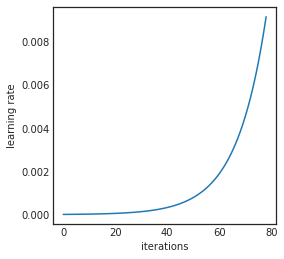

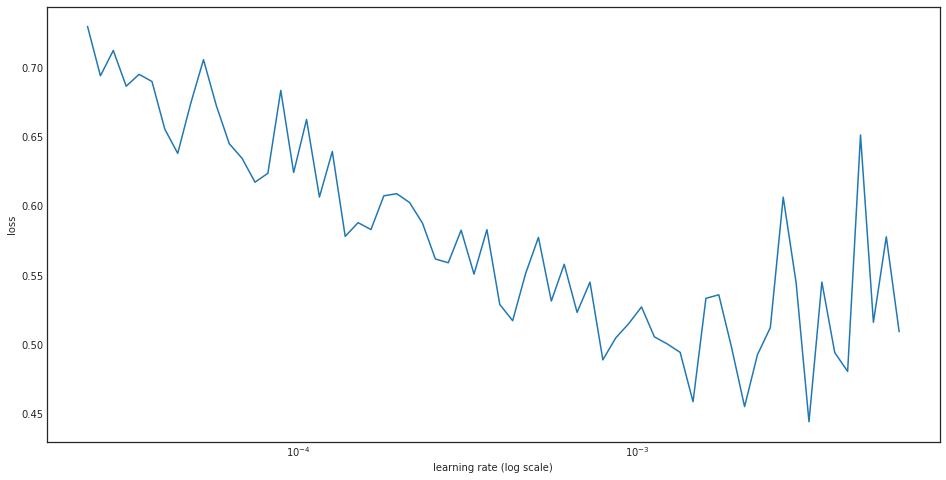

______________________________________



In [10]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-2], trainOnWeights=False, verbose=0)

In [4]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 0.0208543880292
2 New best found: 0.0176472871471
3 New best found: 0.0172742053393
4 New best found: 0.017154297963
5 New best found: 0.0169297723417
6 New best found: 0.0167747451025
7 New best found: 0.0166962825327
8 New best found: 0.0166420918159
9 New best found: 0.0165646317445
10 New best found: 0.0164666113968
11 New best found: 0.0164216020237
12 New best found: 0.0163996564412
13 New best found: 0.0163710058105
14 New best found: 0.0163239729253
15 New best found: 0.0162978684138
18 New best found: 0.0162190084726
19 New best found: 0.016121870225
20 New best found: 0.0161032521818
21 New best found: 0.0160946347587
22 New best found: 0.0160421002501
24 New best found: 0.0160302929519
25 New best found: 0.0159745878975
27 New best found: 0.0158817405058
28 New best found: 0.0158739298713
29 New best found: 0.0158389341674
31 New best found: 0.01579213

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107709). Check your callbacks.
  % delta_t_median)


1 New best found: 0.0224322047983
2 New best found: 0.018634769512
3 New best found: 0.0182144713656
4 New best found: 0.0178700338916
5 New best found: 0.0175834746382
6 New best found: 0.0173954444308
7 New best found: 0.0172059445952
8 New best found: 0.017056060183
9 New best found: 0.0169642719079
10 New best found: 0.0168509890295
11 New best found: 0.0167700827541
13 New best found: 0.016752530228
14 New best found: 0.016628543892
16 New best found: 0.0165815449416
18 New best found: 0.0165261240256
19 New best found: 0.0164681521127
20 New best found: 0.0164396428378
22 New best found: 0.0164300160466
23 New best found: 0.0163664033226
24 New best found: 0.0163463005142
25 New best found: 0.0163197371362
26 New best found: 0.0162672045532
28 New best found: 0.0162659373839
29 New best found: 0.0162190150949
31 New best found: 0.0161739645414
33 New best found: 0.0161513173498
34 New best found: 0.016121319374
36 New best found: 0.0160535666124
37 New best found: 0.0159963858938

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156639). Check your callbacks.
  % delta_t_median)


1 New best found: 0.0204032005699
2 New best found: 0.0180129049728
3 New best found: 0.0176539043329
4 New best found: 0.0174198001856
5 New best found: 0.0171847677604
6 New best found: 0.0170229009563
7 New best found: 0.0168560451521
8 New best found: 0.0167103758393
9 New best found: 0.0166999384492
10 New best found: 0.0165149435985
11 New best found: 0.0164423233464
12 New best found: 0.0163938639936
13 New best found: 0.0163125718337
14 New best found: 0.0162531239862
16 New best found: 0.0161913756471
17 New best found: 0.0161272669149
18 New best found: 0.0160806217009
19 New best found: 0.0160349258998
20 New best found: 0.0160272011541
21 New best found: 0.0159788566006
22 New best found: 0.015946842227
23 New best found: 0.0158950220576
25 New best found: 0.0158527628904
26 New best found: 0.015802143976
27 New best found: 0.0157610019126
29 New best found: 0.0157011611413
31 New best found: 0.0156375305978
34 New best found: 0.0155746750097
35 New best found: 0.0154669965

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176493). Check your callbacks.
  % delta_t_median)


1 New best found: 0.025449670364
2 New best found: 0.0187707277996
3 New best found: 0.0182474580456
4 New best found: 0.0178777966206
5 New best found: 0.0176476427015
6 New best found: 0.0174871430934
7 New best found: 0.0173882881735
8 New best found: 0.0172245708057
9 New best found: 0.0171439642611
10 New best found: 0.0170691653808
11 New best found: 0.017053024652
12 New best found: 0.0169828194849
13 New best found: 0.0169317410322
15 New best found: 0.0168447940298
16 New best found: 0.0168298839548
17 New best found: 0.0168063932817
18 New best found: 0.0167691208485
20 New best found: 0.01676534927
21 New best found: 0.0167123353282
22 New best found: 0.0166714130913
23 New best found: 0.0166286523137
24 New best found: 0.0166128660966
26 New best found: 0.0165311974256
27 New best found: 0.0164928475408
29 New best found: 0.0164693335239
30 New best found: 0.0164359206407
33 New best found: 0.0163588560442
34 New best found: 0.0162946088516
36 New best found: 0.016246574474

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.239733). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120299). Check your callbacks.
  % delta_t_median)


1 New best found: 0.0261322193409
2 New best found: 0.0177415066926
3 New best found: 0.0172468097662
4 New best found: 0.0169809155693
5 New best found: 0.0168684531352
6 New best found: 0.0167000295001
7 New best found: 0.0166582427931
8 New best found: 0.0165256345639
9 New best found: 0.0164950975781
10 New best found: 0.0164357870415
11 New best found: 0.0163420423611
12 New best found: 0.0162706351181
13 New best found: 0.0162144201424
14 New best found: 0.0161891075471
16 New best found: 0.0161325037605
17 New best found: 0.0161057600448
18 New best found: 0.0160702900062
19 New best found: 0.0160122895849
20 New best found: 0.0159793057017
21 New best found: 0.0159769128401
22 New best found: 0.0159018846527
23 New best found: 0.0158852705016
25 New best found: 0.0158222661157
26 New best found: 0.015760850324
30 New best found: 0.0156861353343
32 New best found: 0.0156605284341
33 New best found: 0.0155958689913
35 New best found: 0.0155127737707
36 New best found: 0.015469662

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251209). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126101). Check your callbacks.
  % delta_t_median)


1 New best found: 0.0244622743596
2 New best found: 0.0182079813685
3 New best found: 0.0177517363821
4 New best found: 0.0175001302114
5 New best found: 0.0173723689287
6 New best found: 0.0171960999257
7 New best found: 0.0170713503118
8 New best found: 0.0169939372836
10 New best found: 0.0168756780196
11 New best found: 0.016814699006
12 New best found: 0.0168066855854
13 New best found: 0.0167429103307
14 New best found: 0.01670804511
15 New best found: 0.0166177167468
16 New best found: 0.0166110947822
17 New best found: 0.01655951791
18 New best found: 0.0165213224944
19 New best found: 0.0165002345164
20 New best found: 0.0164451138477
22 New best found: 0.0163676601586
23 New best found: 0.0163438939428
24 New best found: 0.0163243750868
27 New best found: 0.0161818660284
29 New best found: 0.0161412599988
31 New best found: 0.0161004292468
32 New best found: 0.0160891518295
33 New best found: 0.0159937874509
36 New best found: 0.0159508895333
38 New best found: 0.015874776902

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.274550). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137796). Check your callbacks.
  % delta_t_median)


1 New best found: 0.0218294957606
2 New best found: 0.0181596497954
3 New best found: 0.0176979811519
4 New best found: 0.0174481489518
5 New best found: 0.0172470290447
6 New best found: 0.0171016829828
7 New best found: 0.0170200635558
8 New best found: 0.0169098918052
9 New best found: 0.0168192440295
10 New best found: 0.0167726322656
11 New best found: 0.0167080729335
12 New best found: 0.0166830653794
13 New best found: 0.016629528556
14 New best found: 0.0165716448306
15 New best found: 0.0165038350252
16 New best found: 0.0164937052194
17 New best found: 0.016429824463
18 New best found: 0.0163775072831
19 New best found: 0.0163567812411
20 New best found: 0.0163289236793
22 New best found: 0.0162641733597
23 New best found: 0.0162230182553
25 New best found: 0.0161844434242
26 New best found: 0.0161009522545
28 New best found: 0.0160330517897
29 New best found: 0.0159890793417
31 New best found: 0.0159474701964
32 New best found: 0.0159201723332
33 New best found: 0.0158971318

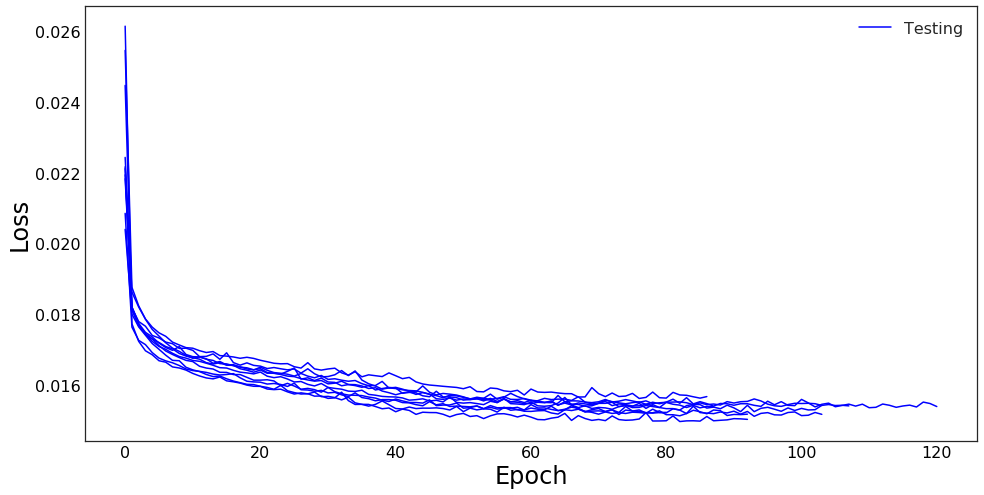

Mean wAUC = 0.071 +- 0.0006
______________________________________



In [5]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, useCosAnneal=True, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [6]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [7]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 5 with loss = 0.014985546637733148
Model 1 is 2 with loss = 0.01513289616570456
Model 2 is 0 with loss = 0.015147299900573516
Model 3 is 7 with loss = 0.015193135221263672
Model 4 is 9 with loss = 0.015264193293390077
Model 5 is 3 with loss = 0.015355926659096252
Model 6 is 1 with loss = 0.0153751007223791
Model 7 is 4 with loss = 0.01541264425722525
Model 8 is 8 with loss = 0.015417796207091019
Model 9 is 6 with loss = 0.015636403907304596


## Response on development data

In [8]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000587076599863s per sample

Predicting batch 2 out of 10
Prediction took 0.000350618617522s per sample

Predicting batch 3 out of 10
Prediction took 0.0003512128938s per sample

Predicting batch 4 out of 10
Prediction took 0.000355526304245s per sample

Predicting batch 5 out of 10
Prediction took 0.000351472103596s per sample

Predicting batch 6 out of 10
Prediction took 0.000365053701401s per sample

Predicting batch 7 out of 10
Prediction took 0.000368224406242s per sample

Predicting batch 8 out of 10
Prediction took 0.000359202070268s per sample

Predicting batch 9 out of 10
Prediction took 0.000359066212569s per sample

Predicting batch 10 out of 10
Prediction took 0.000349521875393s per sample



In [9]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.887755480448, weighted 0.931264900304


## Response on val data

In [10]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000347929954529s per sample

Predicting batch 2 out of 10
Prediction took 0.000361699819565s per sample

Predicting batch 3 out of 10
Prediction took 0.000343853187561s per sample

Predicting batch 4 out of 10
Prediction took 0.000343347406387s per sample

Predicting batch 5 out of 10
Prediction took 0.000358658790588s per sample

Predicting batch 6 out of 10
Prediction took 0.000343969964981s per sample

Predicting batch 7 out of 10
Prediction took 0.000326766395569s per sample

Predicting batch 8 out of 10
Prediction took 0.000409051799774s per sample

Predicting batch 9 out of 10
Prediction took 0.00038825340271s per sample

Predicting batch 10 out of 10
Prediction took 0.000417892217636s per sample



In [11]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.887055966673, weighted 0.928217908471


## Evaluation

### Import in dataframe

In [12]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [13]:
devData = convertToDF(trainData)
valData = convertToDF(valData)

200000 candidates loaded
50000 candidates loaded


In [14]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

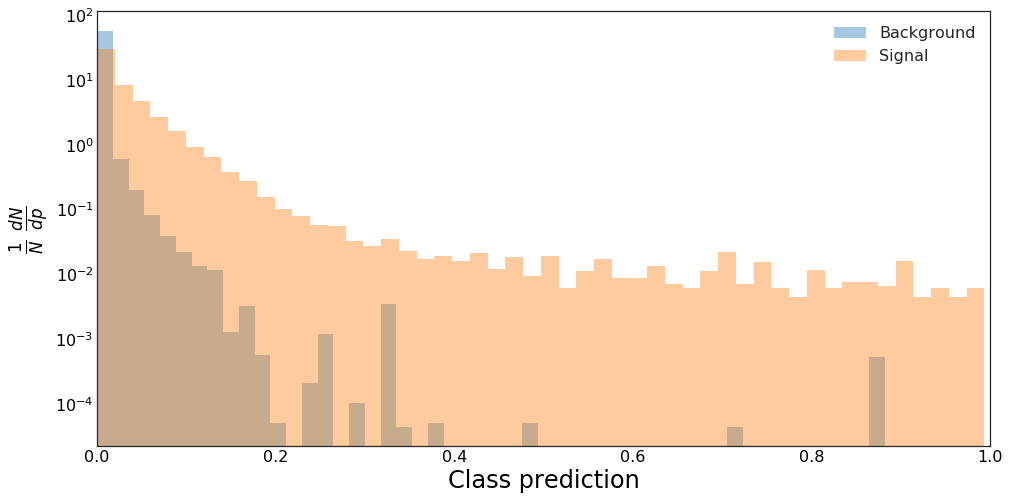

In [15]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [16]:
def AMS(s, b):
    """ Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )        
    where b_r = 10, b = background, s = signal, log is natural logarithm """
    
    br = 10.0
    radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) -s)
    if radicand < 0:
        print 'radicand is negative. Exiting'
        exit()
    else:
        return math.sqrt(radicand)
    
def amsScan(inData, res=0.0001):
    best = [0,-1]
    for i in np.linspace(0.,1.,1./res):
        ams = AMS(np.sum(inData.loc[(inData['pred_class'] >= i) & sigVal, 'gen_weight']),
                  np.sum(inData.loc[(inData['pred_class'] >= i) & bkgVal, 'gen_weight']))
        if ams > best[1]:
            best = [i, ams]
    print best

amsScan(valData)

/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


[0.020302030203020304, 1.6320842530154704]


In [21]:
def scoreTest(ensemble, weights, features, cut, name):
    testData = pandas.read_csv('../Data/test.csv')
    with open(dirLoc + 'inputPipe.pkl', 'r') as fin:
        inputPipe = pickle.load(fin)

    testData['pred_class'] = ensemblePredict(inputPipe.transform(testData[features].values.astype('float32')), ensemble, weights)    	

    testData['Class'] = 'b'
    testData.loc[testData.pred_class >= cut, 'Class'] = 's'

    testData.sort_values(by=['pred_class'], inplace=True)
    testData['RankOrder']=range(1, len(testData)+1)
    testData.sort_values(by=['EventId'], inplace=True)

    testData.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [22]:
scoreTest(ensemble, weights, classTrainFeatures, 0.020302030203020304, 'Model_0_Basic_Features_256_1e-3_weighted')

## Save classified data

In [ ]:
name = dirLoc + signal + "_" + channel + "_" + varSet + '_' + classModel + '_classifiedData.csv'
print "Saving data to", name
valData.to_csv(name, columns=['gen_target', 'gen_weight', 'gen_sample', 'pred_class'])

## Save/load

In [ ]:
name = "weights/DNN_" + signal + "_" + channel + "_" + varSet + '_' + classModel
print name

### Save

In [ ]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

### Load

In [ ]:
ensemble, weights, compileArgs, inputPipe, outputPipe = loadEnsemble(name)